PREDICCIÓN DE LA PRODUCCIÓN DE CAFE EN NARIÑO



Autor: Mario Casanova

Bootcamp: Inteligencia Artificial


Nivel: Explorador (Basico)


Cohorte: 4



##**OBJETIVO GENERAL**

Desarrollar un modelo de predicción de la producción de café en el departamento de Nariño utilizando Python, debido a su capacidad para procesar grandes volúmenes de datos climáticos y agrícolas, aplicar algoritmos de aprendizaje automático y generar visualizaciones que faciliten la toma de decisiones agrícolas.




##**Objetivos Especificos**

1. Recolectar, procesar y analizar datos históricos de producción cafetera y variables climáticas del departamento de Nariño utilizando Python, con el fin de identificar patrones y relaciones significativas que influyan en la productividad.

2. Diseñar y evaluar un modelo predictivo en Python basado en técnicas de aprendizaje automático, que permita estimar la producción de café en Nariño en función de variables agroclimáticas y estacionales.




CARGAR DATASET



In [1]:
import pandas as pd


df = pd.read_csv('dataset_cafe_narino.csv', encoding='latin1', sep=None, engine='python')

In [2]:
df.head(10)

,ID,Municipio,Sistema,Variedad,Arboles_ha,Produccion_anual_kg,Costo_COP_ha_anual,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1,El Tambo,C3,Colombia,5121,1892,2994768,37,37,37,473,473,378,378,18,18,18,9,9
1,2,Pasto,C4,Colombia,5345,2105,3054185,42,42,42,526,526,421,421,21,21,21,10,10
2,3,San Pablo,C2,Castillo,5330,1842,2658973,36,36,36,460,460,368,368,18,18,18,9,9
3,4,El Tambo,C3,Colombia,4914,2281,2534658,45,45,45,570,570,456,456,22,22,22,11,11
4,5,El Tambo,C1,Castillo,5488,1636,2317069,32,32,32,409,409,327,327,16,16,16,8,8
5,6,Taminango,C1,Colombia,5179,1661,1761785,33,33,33,415,415,332,332,16,16,16,8,8
6,7,Consaca,C4,Colombia,5406,1715,2625181,34,34,34,428,428,343,343,17,17,17,8,8
7,8,Consaca,C4,Colombia,4969,2500,3832293,50,50,50,625,625,500,500,25,25,25,12,12
8,9,Buesaco,C1,Colombia,5137,1900,2286882,38,38,38,475,475,380,380,19,19,19,9,9
9,10,La Unión,C2,Colombia,5059,2377,2459612,47,47,47,594,594,475,475,23,23,23,11,11


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Arboles_ha'}>,
        <Axes: title={'center': 'Produccion_anual_kg'}>,
        <Axes: title={'center': 'Costo_COP_ha_anual'}>],
       [<Axes: title={'center': 'Enero'}>,
        <Axes: title={'center': 'Febrero'}>,
        <Axes: title={'center': 'Marzo'}>,
        <Axes: title={'center': 'Abril'}>],
       [<Axes: title={'center': 'Mayo'}>,
        <Axes: title={'center': 'Junio'}>,
        <Axes: title={'center': 'Julio'}>,
        <Axes: title={'center': 'Agosto'}>],
       [<Axes: title={'center': 'Septiembre'}>,
        <Axes: title={'center': 'Octubre'}>,
        <Axes: title={'center': 'Noviembre'}>,
        <Axes: title={'center': 'Diciembre'}>]], dtype=object)

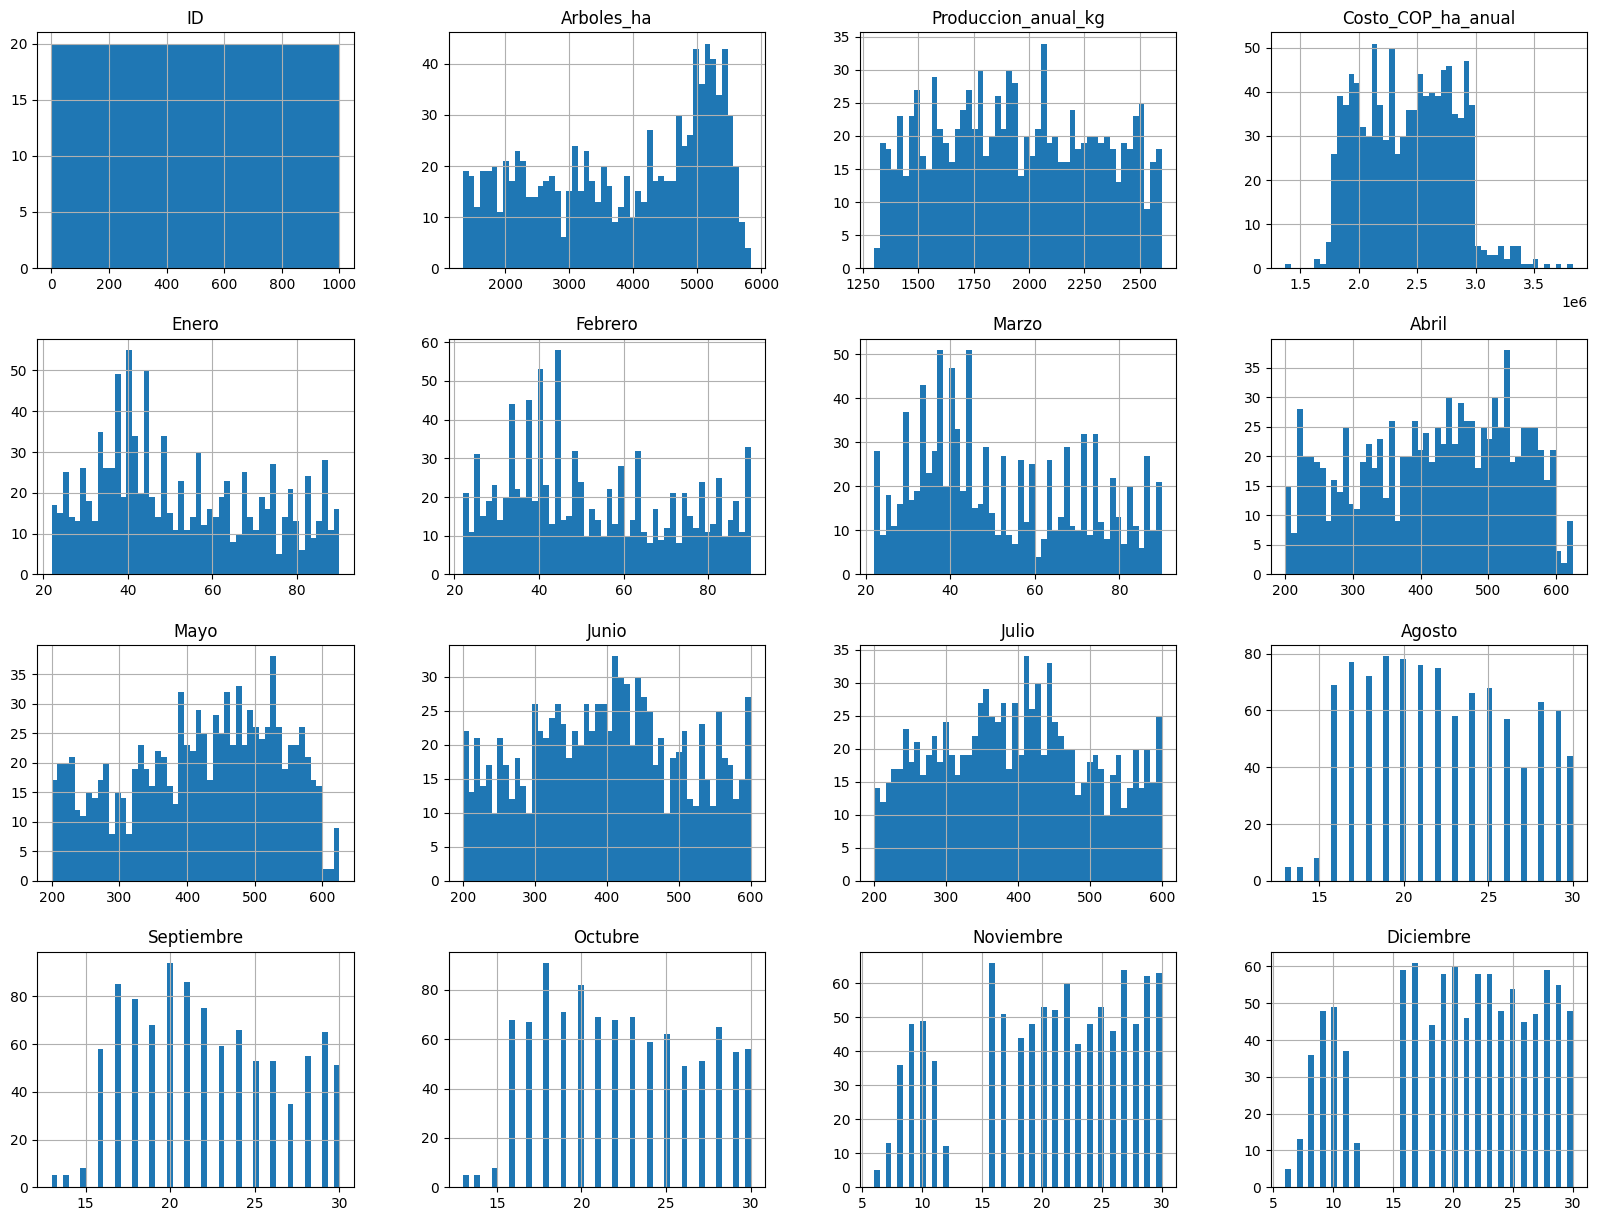

In [3]:
df.hist(bins=50, figsize=(20,15))

REGRESION LINEAL

In [4]:
## regresion lineal #

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# --- 2. Filtrar columnas numéricas y eliminar nulos ---
df_num = df.select_dtypes(include=['int64', 'float64']).dropna()

if df_num.shape[1] < 2:
    raise ValueError("Debe haber al menos una variable independiente y una dependiente numérica.")


In [5]:
# --- 3. Separar Variables ---
y = df_num.iloc[:, -1]    # Última como dependiente
X = df_num.iloc[:, :-1]   # El resto como independientes



In [6]:
# --- 4. División Entrenamiento/Prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# --- 5. Ajustar Modelo ---
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


In [8]:
# --- 6. Evaluaciones ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n--- MÉTRICAS DE EVALUACIÓN ---")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


--- MÉTRICAS DE EVALUACIÓN ---
MAE:  3.84
RMSE: 4.67
R²:   0.4982


In [9]:
# --- 7. Validación Cruzada ---
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print(f"\nR² Promedio Cross-Validation (5-fold): {scores.mean():.4f} (± {scores.std():.4f})")


R² Promedio Cross-Validation (5-fold): -17.2159 (± 33.4608)


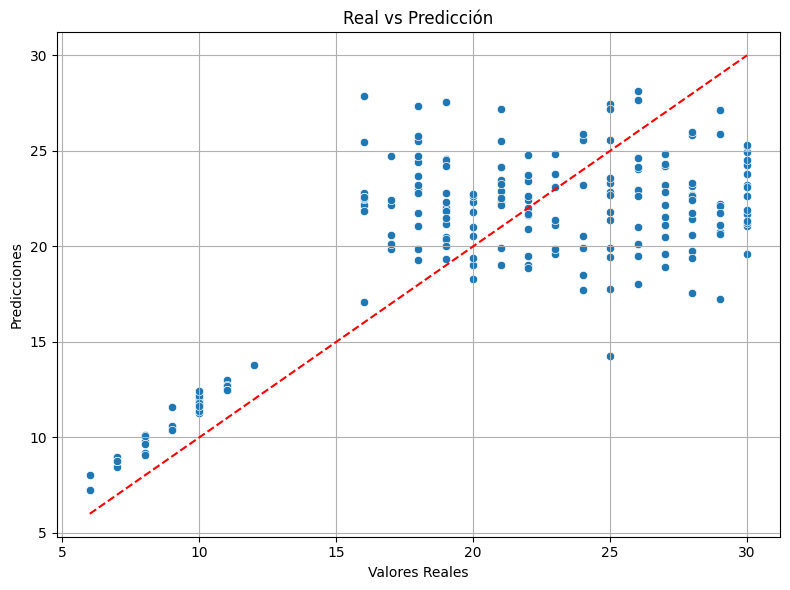

In [10]:

# --- 8. Visualización: Real vs. Predicho ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Real vs Predicción")
plt.grid(True)
plt.tight_layout()
plt.show()

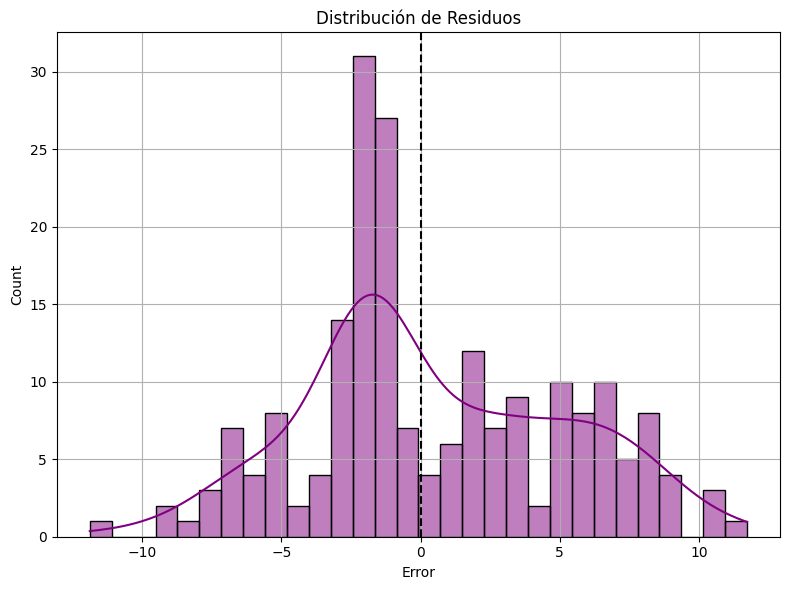

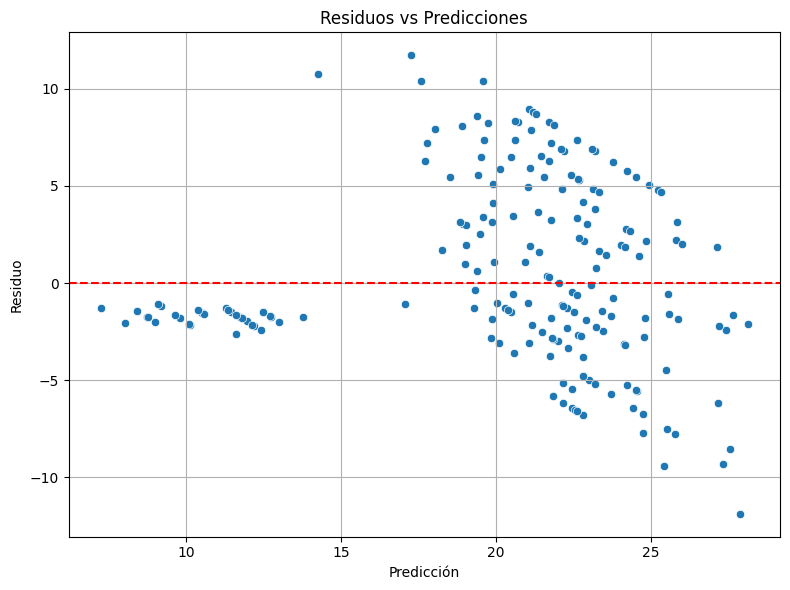

In [11]:

# --- 9. Visualización: Residuos ---
residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, bins=30, color='purple')
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribución de Residuos")
plt.xlabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicción")
plt.ylabel("Residuo")
plt.title("Residuos vs Predicciones")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-3661168741.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coeficiente', y='Variable', palette='coolwarm')


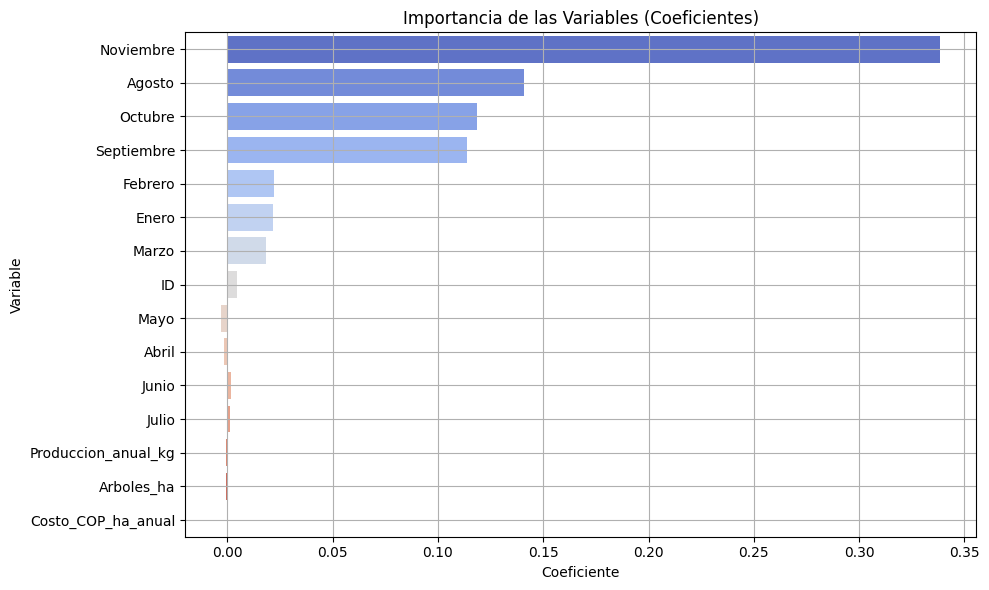

In [12]:

# --- 10. Visualización: Coeficientes ---
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coeficiente', y='Variable', palette='coolwarm')
plt.title("Importancia de las Variables (Coeficientes)")
plt.grid(True)
plt.tight_layout()
plt.show()


CONCLUSIÓN

El desarrollo del modelo de regresión lineal para predecir la producción de café en el departamento de Nariño ha permitido establecer una base analítica utilizando herramientas de análisis de datos en Python. Si bien se obtuvo una capacidad moderada de predicción, los resultados indican la necesidad de mejorar la calidad del dataset y considerar otros modelos más robustos. Este trabajo representa un avance hacia la implementación de soluciones basadas en datos para el fortalecimiento del sector agrícola en Nariño.

enlace video proyecto:

https://drive.google.com/file/d/1Yz9I9y-EH8C___-Kfl1-5B-HGfA_z-AL/view?usp=drive_link